In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import Ridge, LinearRegression, SGDRegressor, Lasso, ElasticNet
from xgboost import XGBRegressor

# To Avoid unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

Data preparation and preprocessing

In [2]:
#Loading data

test_data = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Predicting house prices\test.csv')
train_data = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Predicting house prices\train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_data = train_data.drop(['Id'] , axis =1)
test_data = test_data.drop(['Id'] , axis =1)

In [4]:
# Checking the number of rows and columns

print('Number of rows:', train_data.shape[0])
print('Number of columns:', train_data.shape[1])

Number of rows: 1460
Number of columns: 80


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
# Extracting numerical data

train_data = train_data.select_dtypes(include=['int64', 'float64'])

test_data =  test_data.select_dtypes(include=['int64', 'float64'])

In [7]:
train_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


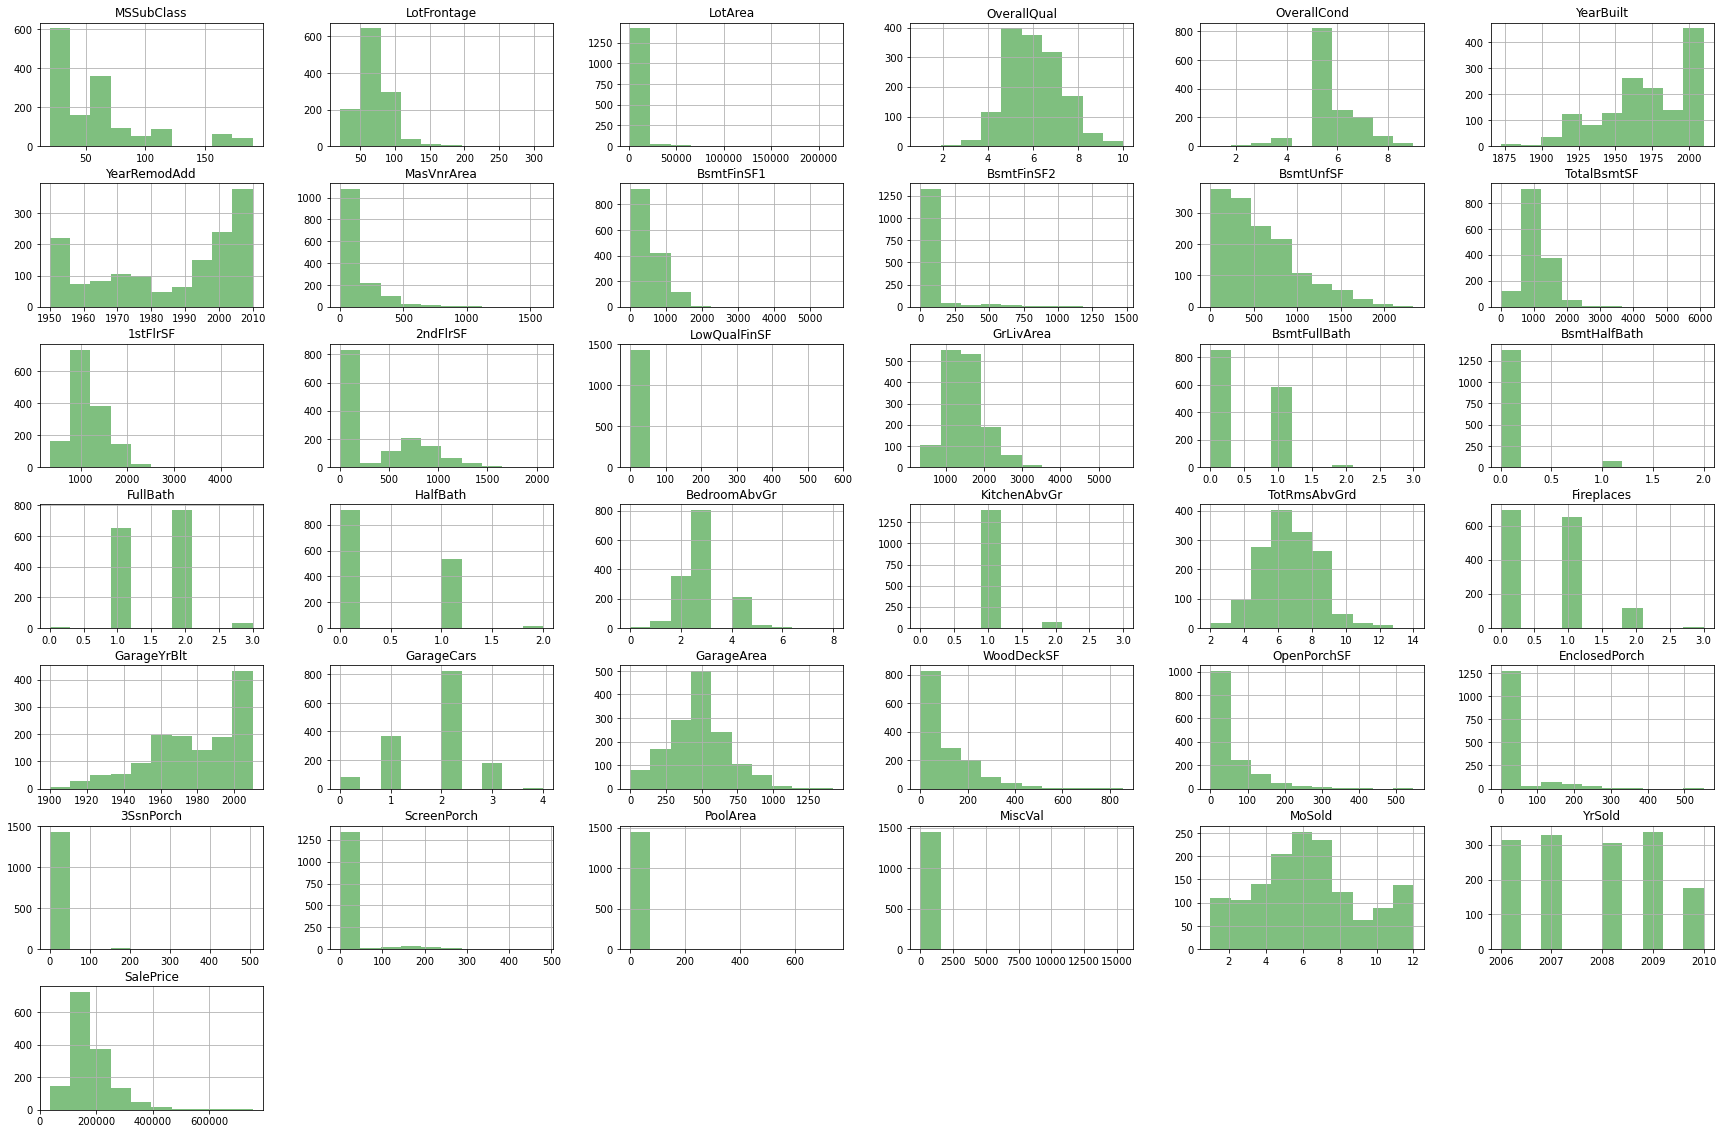

In [8]:
# Exploratory data analysis to check for class imbalance

train_data.hist(figsize =(30,20), color = 'green', alpha = 0.5);

In [9]:
# Looking for missing train_data 

train_data.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [10]:
# Looking for missing test_data

test_data.isnull().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

Replacing null values

In [11]:
# Filling null values with median

test_data.fillna(test_data.median(), inplace = True)

test_data.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [12]:
# Filling null values with median

train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].median())

train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median())

train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median())

In [13]:
# Looking for duplicates

sum(train_data.duplicated())

0

In [14]:
# Splitting

x = train_data.iloc[:,:-1]

y = train_data.iloc[:,-1]

Checking Skewness

In [15]:
# Checking for skewness

skewed_features = [col for col in train_data.columns if train_data[col].skew() > 0.5]

print(len(skewed_features))

27


Taking the log makes the data less skewed

In [16]:
train_data[skewed_features] = train_data[skewed_features].apply(lambda x: np.log1p(x))

In [17]:
skewed_features.remove('SalePrice')

In [18]:
test_data[skewed_features] = test_data[skewed_features].apply(lambda x: np.log1p(x))

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [20]:
# Splitting the dataset into the Training set and Test set

x = train_data.drop('SalePrice', axis = 1)

y = train_data['SalePrice']

Scaling

Many machine learning algorithms as Linear Regression performs better when numerical input variables are scaled to a standard range.

In [21]:
# Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = sc.fit_transform(x)

In [22]:
test_data = sc.transform(test_data)

Linear Regression

In [23]:
# cross validation

lr = LinearRegression()

cv_score = cross_validate(lr, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score

{'fit_time': array([1.28824759, 0.00893545, 0.0079999 , 0.0099895 , 0.00799489,
        0.00993919, 0.00799227, 0.00899315, 0.01001   , 0.00901532]),
 'score_time': array([0.00298142, 0.00299811, 0.00299788, 0.00299621, 0.00300479,
        0.00299335, 0.00299811, 0.00299788, 0.0049808 , 0.00397563]),
 'test_neg_root_mean_squared_error': array([-0.13274667, -0.11530108, -0.12065251, -0.16903296, -0.15331432,
        -0.1284896 , -0.12339333, -0.12101456, -0.1843094 , -0.13793119]),
 'test_neg_mean_squared_error': array([-0.01762168, -0.01329434, -0.01455703, -0.02857214, -0.02350528,
        -0.01650958, -0.01522591, -0.01464452, -0.03396996, -0.01902501])}

In [24]:
 cv_score['test_neg_root_mean_squared_error'].mean()

-0.13861856201527376

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

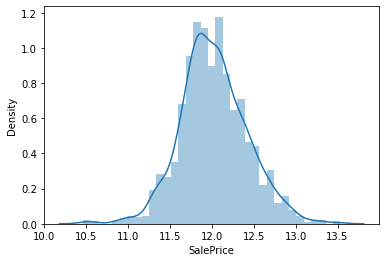

In [25]:
# Checking data skewness

sns.distplot(y)

Distribution shows positive skewness

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x, y)

LinearRegression()

In [27]:
model.score(x, y)

0.8860406993795064

In [28]:
y_pred = model.predict(x)
y_pred

array([12.26354905, 12.17866885, 12.32404922, ..., 12.28162312,
       11.77022057, 11.8889255 ])

In [29]:
r2_score(y, y_pred)

0.8860406993795064

In [30]:
mean_squared_error(y,y_pred, squared=False)

0.13479933233010663

In [31]:
valid_pred = model.predict(x)

In [32]:
r2_score(y,valid_pred)

0.8860406993795064

SGDRegressor

In [33]:
# cross validation

lr = SGDRegressor()

cv_score = cross_validate(lr, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score

{'fit_time': array([1.56905746, 0.00699496, 0.0069437 , 0.0059967 , 0.00599194,
        0.00499868, 0.00799417, 0.00699568, 0.00504136, 0.00499439]),
 'score_time': array([0.49866986, 0.00199842, 0.00204825, 0.00194693, 0.00200176,
        0.00099945, 0.00100017, 0.00200129, 0.00199652, 0.00200129]),
 'test_neg_root_mean_squared_error': array([-0.13239797, -0.11462402, -0.12355682, -0.17435525, -0.15158951,
        -0.12253643, -0.12641532, -0.12145401, -0.18990891, -0.14802093]),
 'test_neg_mean_squared_error': array([-0.01752922, -0.01313867, -0.01526629, -0.03039975, -0.02297938,
        -0.01501518, -0.01598083, -0.01475108, -0.0360654 , -0.0219102 ])}

In [34]:
cv_score['test_neg_root_mean_squared_error'].mean()

-0.14048591602677887

Ridge

In [35]:
# cross validation

lr = Ridge()

cv_score = cross_validate(lr, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score

{'fit_time': array([1.34523799e+01, 8.99028778e-03, 7.99298286e-03, 3.99899483e-03,
        2.99859047e-03, 3.99732590e-03, 4.00042534e-03, 3.99875641e-03,
        4.99892235e-03, 3.99756432e-03]),
 'score_time': array([0.00399423, 0.00499654, 0.00199819, 0.00299907, 0.00199676,
        0.00199795, 0.00299478, 0.00199747, 0.00199819, 0.00199604]),
 'test_neg_root_mean_squared_error': array([-0.13266706, -0.11530908, -0.12064604, -0.16908431, -0.1532324 ,
        -0.12823921, -0.12336189, -0.12098925, -0.18442938, -0.13794213]),
 'test_neg_mean_squared_error': array([-0.01760055, -0.01329618, -0.01455547, -0.0285895 , -0.02348017,
        -0.01644529, -0.01521816, -0.0146384 , -0.0340142 , -0.01902803])}

In [36]:
cv_score['test_neg_root_mean_squared_error'].mean()

-0.13859007384736352

Lasso before regularization

In [37]:
lr = Lasso()

cv_score = cross_validate(lr, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score

{'fit_time': array([0.80348563, 0.00799847, 0.00399327, 0.00399852, 0.00299883,
        0.00299883, 0.0019989 , 0.00299835, 0.00299668, 0.00199938]),
 'score_time': array([0.00499988, 0.00499535, 0.00199604, 0.00099945, 0.00099969,
        0.00099969, 0.00199866, 0.00200033, 0.00100017, 0.0019989 ]),
 'test_neg_root_mean_squared_error': array([-0.37870216, -0.39535428, -0.42447954, -0.42578684, -0.45436008,
        -0.3600604 , -0.39006828, -0.37468495, -0.3797284 , -0.40314914]),
 'test_neg_mean_squared_error': array([-0.14341533, -0.15630501, -0.18018288, -0.18129443, -0.20644308,
        -0.12964349, -0.15215326, -0.14038881, -0.14419366, -0.16252923])}

In [38]:
cv_score['test_neg_root_mean_squared_error'].mean()

-0.3986374079901046

Lasso after regularization

In [39]:
lr = Lasso(alpha = 0.001)

cv_score = cross_validate(lr, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score

{'fit_time': array([0.21785474, 0.04496312, 0.0459671 , 0.03397942, 0.03097773,
        0.03597689, 0.0319798 , 0.03597903, 0.01799107, 0.02997994]),
 'score_time': array([0.00400329, 0.00400257, 0.00399709, 0.00299883, 0.00299764,
        0.00299835, 0.00299883, 0.00299478, 0.00399709, 0.00299811]),
 'test_neg_root_mean_squared_error': array([-0.13267433, -0.11436505, -0.12075392, -0.16850088, -0.1536438 ,
        -0.1273189 , -0.12355779, -0.1210913 , -0.18355859, -0.13652246]),
 'test_neg_mean_squared_error': array([-0.01760248, -0.01307937, -0.01458151, -0.02839255, -0.02360642,
        -0.0162101 , -0.01526653, -0.0146631 , -0.03369376, -0.01863838])}

In [40]:
cv_score['test_neg_root_mean_squared_error'].mean()

-0.13819870387313649

ElasticNet

In [41]:
#cross validation

lr = ElasticNet()

cv_score = cross_validate(lr, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score

{'fit_time': array([0.01299047, 0.00799346, 0.00799537, 0.008991  , 0.00899744,
        0.00899267, 0.00699544, 0.00599766, 0.00699425, 0.00499773]),
 'score_time': array([0.00499725, 0.00399661, 0.00500083, 0.00699496, 0.00699806,
        0.00299668, 0.00299883, 0.00399709, 0.00299764, 0.00299716]),
 'test_neg_root_mean_squared_error': array([-0.37870216, -0.39535428, -0.42447954, -0.42578684, -0.45436008,
        -0.3600604 , -0.39006828, -0.37468495, -0.3797284 , -0.40314914]),
 'test_neg_mean_squared_error': array([-0.14341533, -0.15630501, -0.18018288, -0.18129443, -0.20644308,
        -0.12964349, -0.15215326, -0.14038881, -0.14419366, -0.16252923])}

In [42]:
cv_score['test_neg_root_mean_squared_error'].mean()

-0.3986374079901046

Kernel SVM (Linear, Poly, RBF)

In [43]:
from sklearn.svm import SVR

In [44]:
#Linear kernel

svr_linear_model = SVR(kernel = 'linear' , C =1)


cv_score = cross_validate(svr_linear_model, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score

{'fit_time': array([2.63028979, 2.48047066, 4.44414306, 5.95514083, 5.76328754,
        5.0417788 , 5.67436075, 5.09873438, 4.79191995, 4.63004827]),
 'score_time': array([0.08098245, 0.00897384, 0.01398778, 0.0169754 , 0.01599169,
        0.01796961, 0.01498938, 0.01499152, 0.01499009, 0.01397109]),
 'test_neg_root_mean_squared_error': array([-0.13230056, -0.11271437, -0.1184588 , -0.16924152, -0.15388792,
        -0.12462345, -0.12358789, -0.12131419, -0.1882805 , -0.1365741 ]),
 'test_neg_mean_squared_error': array([-0.01750344, -0.01270453, -0.01403249, -0.02864269, -0.02368149,
        -0.015531  , -0.01527397, -0.01471713, -0.03544955, -0.01865249])}

In [45]:
cv_score['test_neg_root_mean_squared_error'].mean()

-0.13809832958586363

In [46]:
#poly

svr_linear_model = SVR(kernel = 'poly' , C =1)


cv_score = cross_validate(svr_linear_model, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score

{'fit_time': array([0.38381004, 0.35371661, 0.42172885, 0.35777068, 0.45568705,
        0.50467753, 0.45470762, 0.39574933, 0.37981296, 0.36271763]),
 'score_time': array([0.01598597, 0.01598978, 0.01998639, 0.02200413, 0.02398896,
        0.02398419, 0.0199883 , 0.02597809, 0.01598978, 0.01898932]),
 'test_neg_root_mean_squared_error': array([-0.14710798, -0.13659435, -0.15084523, -0.25227902, -0.16629964,
        -0.14930323, -0.13923008, -0.15725648, -0.21145771, -0.1590957 ]),
 'test_neg_mean_squared_error': array([-0.02164076, -0.01865802, -0.02275428, -0.06364471, -0.02765557,
        -0.02229145, -0.01938501, -0.0247296 , -0.04471436, -0.02531144])}

In [47]:
 cv_score['test_neg_root_mean_squared_error'].mean()

-0.16694694197030996

In [48]:
#rbf

svr_linear_model = SVR(kernel = 'rbf' , C =1)

cv_score = cross_validate(svr_linear_model, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score

{'fit_time': array([0.14395404, 0.13292885, 0.13986063, 0.13391352, 0.13491225,
        0.13791156, 0.14695644, 0.15584445, 0.83346939, 0.13689089]),
 'score_time': array([0.01800203, 0.01897764, 0.01698971, 0.01699018, 0.01798964,
        0.0179894 , 0.01898813, 0.02098799, 0.02602673, 0.01799703]),
 'test_neg_root_mean_squared_error': array([-0.13431443, -0.15425801, -0.14425307, -0.19892333, -0.18491463,
        -0.12983798, -0.14684925, -0.12435804, -0.17429905, -0.16296921]),
 'test_neg_mean_squared_error': array([-0.01804037, -0.02379553, -0.02080895, -0.03957049, -0.03419342,
        -0.0168579 , -0.0215647 , -0.01546492, -0.03038016, -0.02655896])}

In [49]:
cv_score['test_neg_root_mean_squared_error'].mean()

-0.15549769962290372

In [50]:
svr_linear_model = SVR(kernel = 'rbf' , C =1)

svr_linear_model.fit(x, y)

SVR(C=1)

Eventually, fitting the data to the chosen ML model 'lasso' to get final results

In [51]:
LR = Lasso(alpha = 0.001)

LR.fit(x, y)

Lasso(alpha=0.001)

In [52]:
y_pred = np.expm1(svr_linear_model.predict(test_data))
y_pred

array([124425.98448813, 161387.91442933, 174320.79709768, ...,
       170215.57103686, 136894.85339343, 227639.80968725])

In [53]:
submission = pd.DataFrame({'Id': range(1461, 1461 + len(test_data)), 'SalePrice': y_pred})

In [54]:
submission.to_csv('submission.csv', index = False)